# Units

## Working with Units

The measurements we will work with are physical quantities, which
means that they have two parts, a value and a unit.
For example, the coordinate 30<sup>°</sup> has value 30 and its units are degrees.

Until recently, most scientific computation was done with values only;
units were left out of the program altogether, [sometimes with
catastrophic
results](https://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure).

Astropy provides tools for including units explicitly in computations,
which makes it possible to detect errors before they cause disasters.

To use Astropy units, we import them like this:

In [1]:
import astropy.units as u

In [4]:
dir(u)[10:20]

['Bethe',
 'Bi',
 'Biot',
 'Bol',
 'Bq',
 'C',
 'Celsius',
 'Ci',
 'CompositeUnit',
 'D']

Associating units to values:

In [5]:
angle = 10 * u.degree
type(angle)

astropy.units.quantity.Quantity

In [6]:
angle

<Quantity 10. deg>

In [8]:
# Change unit

angle_arcmin = angle.to(u.arcmin)
angle_arcmin

<Quantity 600. arcmin>

In [9]:
# Summing two different units

angle + 30 * u.arcmin

<Quantity 10.5 deg>

In [10]:
# Incompatible units

angle + 5 * u.kg

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

### Exercise

Create a quantity that represents 5 arcminutes and assign it to a variable called radius.

Then convert it to degrees.

In [20]:
radius = 5 * u.arcmin
display(radius)

radius_am = radius.to(u.degree)
display(radius_am)

<Quantity 5. arcmin>

<Quantity 0.08333333 deg>

# Coordinates

We will describe here the SkyCoords from astropy, how to transform coordinate system, and how to compute angular separations.

## Definition

Astropy provides a `SkyCoord` object that represents sky coordinates
relative to a specified reference frame.
In the following example we use the [ICRS](https://www.iers.org/IERS/EN/Science/ICRS/ICRS.html) which is the
"International Celestial Reference System", adopted in 1997 by the International Astronomical Union.

The following example creates a `SkyCoord` object that represents the
approximate coordinates of
[Betelgeuse](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=Betelgeuse)
(alf Ori) in the ICRS frame.

In [27]:
from astropy.coordinates import SkyCoord

ra = 88.8 * u.degree
dec = 7.4 * u.degree
coord_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')

coord_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (88.8, 7.4)>

## Transformation

Astronomy makes use of many different [coordinate systems](https://en.wikipedia.org/wiki/Celestial_coordinate_system). Transforming between coordinate systems is a common task in observational astronomy, and thankfully, Astropy has abstracted the required spherical trigonometry for us. Below we show the steps to go from Equatorial coordinates (sky coordinates) to Galactic coordinates.

In [40]:
import astropy.coordinates as co
dir(co)[30:50]

['DifferentialAttribute',
 'Distance',
 'DynamicMatrixTransform',
 'EarthLocation',
 'EarthLocationAttribute',
 'FK4',
 'FK4NoETerms',
 'FK5',
 'FunctionTransform',
 'FunctionTransformWithFiniteDifference',
 'GCRS',
 'GRS80GeodeticRepresentation',
 'Galactic',
 'GalacticLSR',
 'Galactocentric',
 'GenericFrame',
 'GeocentricMeanEcliptic',
 'GeocentricTrueEcliptic',
 'HADec',
 'HCRS']

In [28]:
coord_galactic = coord_icrs.transform_to('galactic')
coord_galactic

<SkyCoord (Galactic): (l, b) in deg
    (199.79693102, -8.95591653)>

In [35]:
coord_ecl = coord_icrs.transform_to('geocentrictrueecliptic')
coord_ecl

<SkyCoord (GeocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, )
    (88.76385221, -16.03444702, 1.)>

### Exercise

Find the ICRS coordinates of our Galaxy center

In [48]:
from astropy.coordinates import SkyCoord

l = 0 * u.degree
b = 0 * u.degree
coord_gal = SkyCoord(l=l, b=b, frame='galactic')
coord_gal.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (266.40498829, -28.93617776)>

## Separation

We will use SkyCoord to compute the angular separation between two sky directions.

In [46]:
from astropy.coordinates import SkyCoord

center = SkyCoord("12h59m48.7s +27d58m50s", frame='icrs')
obj = SkyCoord("12h59m48.7s +27d50m50s", frame='icrs')
sep = obj.separation(center)

display(sep.arcmin * u.arcmin)

<Quantity 8. arcmin>

### Exercise

Find the coordinates of the center of Messier 32 and Messier 31 on Wikipedia.

Define the SkyCoord objects and compute the angular separation between them in degrees.

In [54]:
from astropy.coordinates import SkyCoord
M31 = SkyCoord("00h42m44.3s +41d16m9s", frame='icrs')
M32 = SkyCoord("00h42m41.8s +40d51m55s", frame='icrs')
M32.separation(M31).degree * u.degree

<Quantity 0.40396524 deg>

# Saving queries 

We will download galaxies in the Coma Cluster

In [85]:
from astroquery.sdss import SDSS
from astroquery.ipac.ned import Ned
import numpy as np

ned = Ned.query_object("Coma Cluster")
ra, dec = ned['RA'].value[0], ned['DEC'].value[0]
print(ra, dec)
ddelta = 2.5
rdelta = ddelta / np.cos(dec * np.pi/180)
print(rdelta)
ra1, ra2 = ra-rdelta, ra+rdelta
dec1, dec2 = dec-ddelta,dec+ddelta
print(ra1,ra2)

query_base = """SELECT 
ra ,dec
FROM
PhotoPrimary
WHERE
ra > {ra1} and ra < {ra2}
AND dec > {dec1} and dec < {dec2}
"""

query = query_base.format(ra1=ra1, ra2=ra2, dec1=dec1, dec2=dec2)
res = SDSS.query_sql(query, timeout=400)
try:
    print('Table with ', len(res),' lines')
except:
    print('No results')


194.953 27.981
2.8309261291744567
192.12207387082555 197.78392612917446
Table with  500000  lines


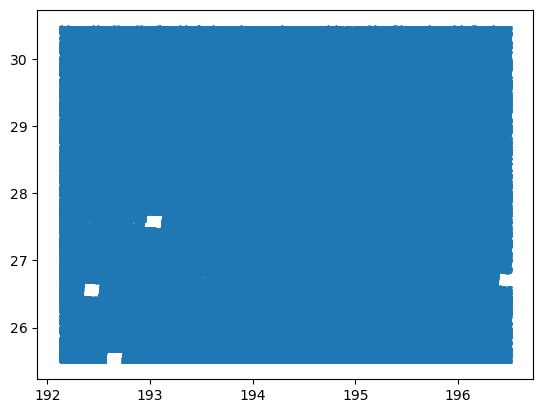

In [86]:
import matplotlib.pyplot as plt
plt.scatter(res['ra'], res['dec'],s=1)
plt.plot(ned['RA'].value, ned['DEC'].value,'x')

In [87]:
# Saving results

filename = 'coma_results.fits'
res.write(filename, overwrite=True)

In [88]:
# Checking file size
from os.path import getsize

MB = 1024 * 1024
print('File size: {0:.2f} MB'.format(getsize(filename) / MB))

File size: 11.45 MB


In [89]:
# Reading table back
from astropy.table import Table

table = Table.read(filename)
table

objID,ra,dec
uint64,float64,float64
1237667448343298569,192.12207735794,25.5069492835942
1237667441900127051,192.122102774192,26.3840663463361
1237667448880169674,192.122105036162,26.0007493206977
1237665440441041157,192.122106664085,28.5894197080655
1237667322186039972,192.122110709499,26.5487543770542
1237667252944830848,192.122115154002,28.9053750645694
1237667323796652875,192.122130244402,27.7563164011662
1237665440441041506,192.122130813189,28.6736039678
1237665440441041510,192.122133153812,28.6300478550853


### Exercise

Search for galaxies in the Coma cluster with redshift from the table SpecPhotoAll.
Use the same limits in RA, Dec as in the example. Limit redshifts between 0 and 0.04.
Then plot it and save the file.

In [96]:
from astroquery.sdss import SDSS
from astroquery.ipac.ned import Ned
import numpy as np

ned = Ned.query_object("Coma Cluster")
ra, dec = ned['RA'].value[0], ned['DEC'].value[0]
ddelta = 8
rdelta = ddelta / np.cos(0.5 * np.pi/180)
ra1, ra2 = ra-rdelta, ra+rdelta
dec1, dec2 = dec-ddelta,dec+ddelta

query_base = """SELECT 
ra ,dec, z
FROM
SpecPhotoAll
WHERE
ra > {ra1} and ra < {ra2}
AND dec > {dec1} and dec < {dec2}
AND z > {z1} and z < {z2}
"""

query = query_base.format(ra1=ra1, ra2=ra2, dec1=dec1, dec2=dec2, z1=0, z2=0.04)
res = SDSS.query_sql(query)
try:
    print('Table with ', len(res),' lines')
except:
    print('No results')


Table with  10564  lines


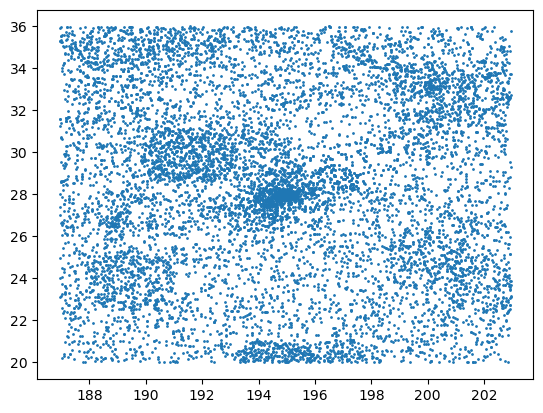

In [97]:
import matplotlib.pyplot as plt
plt.scatter(res['ra'], res['dec'],s=1)
plt.plot(ned['RA'].value, ned['DEC'].value,'x')

In [98]:
# Saving results

filename = 'coma_z_results.fits'
res.write(filename, overwrite=True)

## Exercise

Histogram of reshifts (z) between 0 and 0.04 with 200 bins.

Limit the plot between 0.005 and 0.04 in redshift.

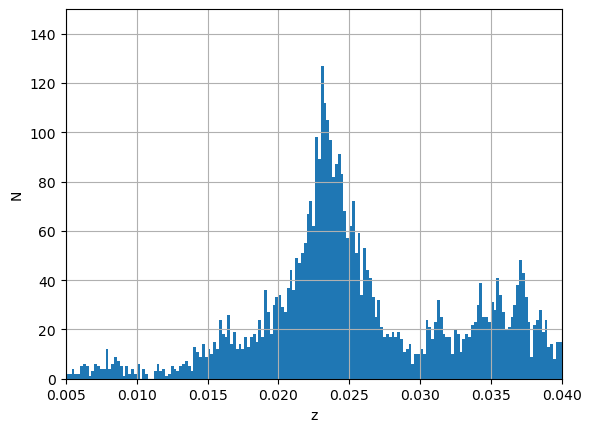

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

filename = 'coma_z_results.fits'
res = Table.read(filename)

counts, bins = np.histogram( res['z'], bins=200)
plt.stairs(counts, bins, fill=True)
plt.xlabel('z')
plt.ylabel('N')
plt.xlim(0.005,0.040)
plt.ylim(0,150)
plt.grid()
plt.show()

## Exercise

Select redshifts between 0.018 and 0.029.

Plot galaxies in this redshift interval in red, the other ones in blue

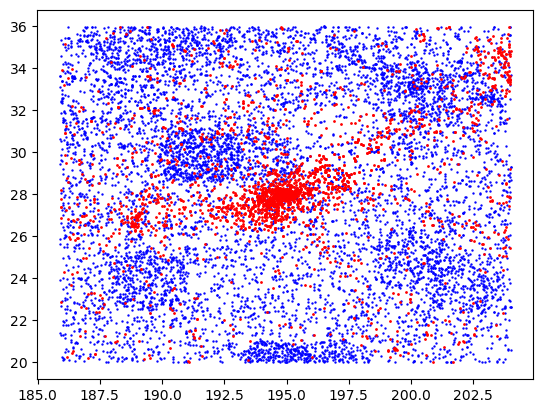

In [102]:
z = res['z'].value
idx = (z > 0.018) & (z < 0.030)
a, d = res['ra'].value, res['dec'].value
plt.scatter(a[~idx], d[~idx], s=0.5, color='blue')
plt.scatter(a[idx], d[idx], s=1, color='red')
plt.show()